In [9]:
import pandas as pd 
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [10]:
# 0.66 * 42000
split = 27720

In [11]:
# file is a pd.dataframe variable which contains the dataframe of train csv file
file = pd.read_csv( 'C:/Users/pc/Downloads/train.csv' , delimiter=',' , header=0)

In [12]:
# storing the file as an array
f = file.as_matrix()

In [13]:
# The training dataset in array form
X_train = f[:split, 1:]
y_train = f[:split, 0]

# The Cross validation set
X_cv = f[split: , 1:]
y_cv = f[split: , 0]

In [14]:
# Declaring error arrays
error_cv = []
error_train = []

# The values of m along the iteration
m_values = list(range(500,split,500))

In [23]:
import numpy as np
for m in m_values:

    nn = MLPClassifier(solver='lbfgs' , alpha = 1 , activation='logistic' , hidden_layer_sizes=(100,))
    nn.fit( X_train[ :m , ] , y_train[ :m , ] )

    y_pred  = nn.predict(X_cv)
    error_cv.append( sum( np.equal(y_pred ,y_cv ) )/len(y_pred) )

    y_pred = nn.predict(X_train[ :m , : ])
    error_train.append( sum( np.equal(y_pred,y_train[ :m , ]) ) /len(y_pred) )

In [24]:
print(error_cv)
print(error_train)

[0.1612044817927171, 0.16365546218487395, 0.83781512605042019, 0.87247899159663866, 0.89110644257703087, 0.89838935574229695, 0.89866946778711487, 0.90833333333333333, 0.90644257703081232, 0.91029411764705881, 0.91211484593837533, 0.91841736694677867, 0.91463585434173666, 0.91211484593837533, 0.91708683473389352, 0.92528011204481797, 0.92836134453781516, 0.92570028011204486, 0.92429971988795523, 0.93039215686274512, 0.92492997198879556, 0.9247899159663866, 0.9247899159663866, 0.92829131652661068, 0.93186274509803924, 0.93333333333333335, 0.93109243697478994, 0.93382352941176472, 0.92808123249299723, 0.93816526610644257, 0.93186274509803924, 0.9304621848739496, 0.93529411764705883, 0.93935574229691876, 0.93690476190476191, 0.93662464985994398, 0.93648459383753502, 0.93284313725490198, 0.93347338935574231, 0.93676470588235294, 0.93536414565826331, 0.93585434173669468, 0.93690476190476191, 0.93977591036414565, 0.9384453781512605, 0.93781512605042017, 0.93879551820728291, 0.938795518207282

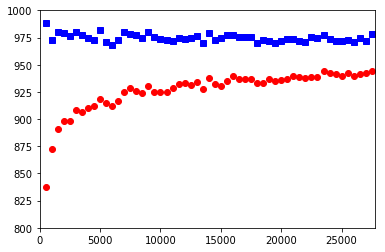

In [35]:
plt.plot(m_values, np.multiply(1000,error_cv[2:]), 'ro' , m_values , np.multiply(1000,error_train) , 'bs')
plt.axis([0, split, 800, 1000])
plt.show()